In [ ]:
Nicholas Chludzinski

In [37]:
codon_table = {
    "UUU": {"Letter": "F", "FullName": "Phenylalanine"},
    "UUC": {"Letter": "F", "FullName": "Phenylalanine"},
    "UUA": {"Letter": "L", "FullName": "Leucine"},
    "UUG": {"Letter": "L", "FullName": "Leucine"},
    "UCU": {"Letter": "S", "FullName": "Serine"},
    "UCC": {"Letter": "S", "FullName": "Serine"},
    "UCA": {"Letter": "S", "FullName": "Serine"},
    "UCG": {"Letter": "S", "FullName": "Serine"},
    "UAU": {"Letter": "Y", "FullName": "Tyrosine"},
    "UAC": {"Letter": "Y", "FullName": "Tyrosine"},
    "UAA": {"Letter": "*", "FullName": "Stop"},
    "UAG": {"Letter": "*", "FullName": "Stop"},
    "UGU": {"Letter": "C", "FullName": "Cysteine"},
    "UGC": {"Letter": "C", "FullName": "Cysteine"},
    "UGA": {"Letter": "*", "FullName": "Stop"},
    "UGG": {"Letter": "W", "FullName": "Tryptophan"},
    
    "CUU": {"Letter": "L", "FullName": "Leucine"},
    "CUC": {"Letter": "L", "FullName": "Leucine"},
    "CUA": {"Letter": "L", "FullName": "Leucine"},
    "CUG": {"Letter": "L", "FullName": "Leucine"},
    "CCU": {"Letter": "P", "FullName": "Proline"},
    "CCC": {"Letter": "P", "FullName": "Proline"},
    "CCA": {"Letter": "P", "FullName": "Proline"},
    "CCG": {"Letter": "P", "FullName": "Proline"},
    "CAU": {"Letter": "H", "FullName": "Histidine"},
    "CAC": {"Letter": "H", "FullName": "Histidine"},
    "CAA": {"Letter": "Q", "FullName": "Glutamine"},
    "CAG": {"Letter": "Q", "FullName": "Glutamine"},
    "CGU": {"Letter": "R", "FullName": "Arginine"},
    "CGC": {"Letter": "R", "FullName": "Arginine"},
    "CGA": {"Letter": "R", "FullName": "Arginine"},
    "CGG": {"Letter": "R", "FullName": "Arginine"},
    
    "AUU": {"Letter": "I", "FullName": "Isoleucine"},
    "AUC": {"Letter": "I", "FullName": "Isoleucine"},
    "AUA": {"Letter": "I", "FullName": "Isoleucine"},
    "AUG": {"Letter": "M", "FullName": "Methionine"},
    "ACU": {"Letter": "T", "FullName": "Threonine"},
    "ACC": {"Letter": "T", "FullName": "Threonine"},
    "ACA": {"Letter": "T", "FullName": "Threonine"},
    "ACG": {"Letter": "T", "FullName": "Threonine"},
    "AAU": {"Letter": "N", "FullName": "Asparagine"},
    "AAC": {"Letter": "N", "FullName": "Asparagine"},
    "AAA": {"Letter": "K", "FullName": "Lysine"},
    "AAG": {"Letter": "K", "FullName": "Lysine"},
    "AGU": {"Letter": "S", "FullName": "Serine"},
    "AGC": {"Letter": "S", "FullName": "Serine"},
    "AGA": {"Letter": "R", "FullName": "Arginine"},
    "AGG": {"Letter": "R", "FullName": "Arginine"},
    
    "GUU": {"Letter": "V", "FullName": "Valine"},
    "GUC": {"Letter": "V", "FullName": "Valine"},
    "GUA": {"Letter": "V", "FullName": "Valine"},
    "GUG": {"Letter": "V", "FullName": "Valine"},
    "GCU": {"Letter": "A", "FullName": "Alanine"},
    "GCC": {"Letter": "A", "FullName": "Alanine"},
    "GCA": {"Letter": "A", "FullName": "Alanine"},
    "GCG": {"Letter": "A", "FullName": "Alanine"},
    "GAU": {"Letter": "D", "FullName": "Aspartic Acid"},
    "GAC": {"Letter": "D", "FullName": "Aspartic Acid"},
    "GAA": {"Letter": "E", "FullName": "Glutamic Acid"},
    "GAG": {"Letter": "E", "FullName": "Glutamic Acid"},
    "GGU": {"Letter": "G", "FullName": "Glycine"},
    "GGC": {"Letter": "G", "FullName": "Glycine"},
    "GGA": {"Letter": "G", "FullName": "Glycine"},
    "GGG": {"Letter": "G", "FullName": "Glycine"},
}


Amino Acid Counts in Zika Virus Proteins:
Serine: 530
Threonine: 673
Histidine: 271
Tyrosine: 160
Proline: 776
Leucine: 553
Asparagine: 173
Lysine: 32
Phenylalanine: 225
Isoleucine: 140
Glutamine: 50
Stop: 19


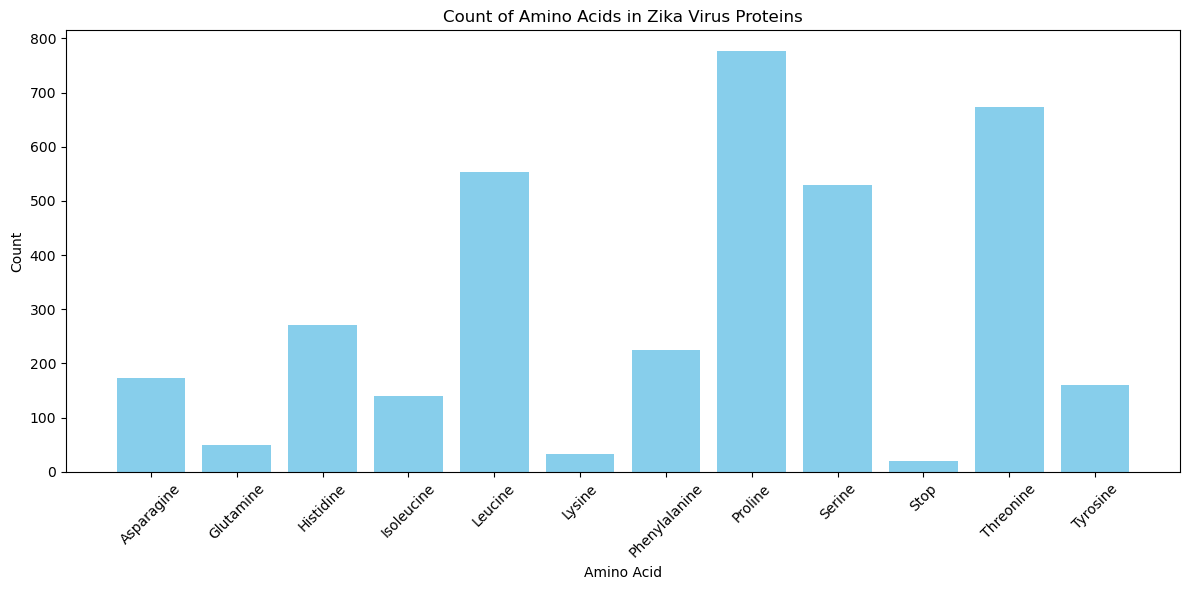

In [39]:
import matplotlib.pyplot as plt


# DNA to mRNA transcription (DNA → RNA)
def dna_to_mrna(dna_sequence):
    transcription = dna_sequence.replace("A", "U").replace("T", "A").replace("C", "G").replace("G", "C")
    return transcription

# mRNA to amino acid (Translation)
def mrna_to_AA(mrna_sequence):
    protein_sequence = []
    for i in range(0, len(mrna_sequence), 3):
        codon = mrna_sequence[i:i+3]
        if codon in codon_table:
            protein_sequence.append(codon_table[codon]["FullName"])
    return protein_sequence

# Count the amino acids across all protein sequences
def count_amino_acids(protein_sequences):
    total_amino_acid_counts = {}
    for protein_sequence in protein_sequences:
        for amino_acid in protein_sequence:
            if amino_acid in total_amino_acid_counts:
                total_amino_acid_counts[amino_acid] += 1
            else:
                total_amino_acid_counts[amino_acid] = 1
    return total_amino_acid_counts

# Read in the file
def read_fasta_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        current_sequence = ''
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(current_sequence)
                current_sequence = ''
            else:
                current_sequence += line.upper()
        if current_sequence:
            sequences.append(current_sequence)
    return sequences

# Input file
input_fasta_file = '/Users/nicho/Downloads/full-zika.fasta' 

# Read DNA sequences from FASTA file
dna_sequences = read_fasta_file(input_fasta_file)

# DNA --> mRNA, then mRNA --> protein sequence of amino acids
protein_sequences = []
for dna_seq in dna_sequences:
    mrna_seq = dna_to_mrna(dna_seq)  # Transcribe DNA to mRNA
    protein_seq = mrna_to_AA(mrna_seq)  # Translate mRNA to protein
    protein_sequences.append(protein_seq)

# Count total amino acids across all protein sequences
total_amino_acid_counts = count_amino_acids(protein_sequences)

# Sort amino acids by their full names for consistent plotting order
sorted_amino_acids = sorted(total_amino_acid_counts.items(), key=lambda x: x[0])

# Extract amino acid names and counts for plotting
amino_acids = [aa[0] for aa in sorted_amino_acids]
counts = [aa[1] for aa in sorted_amino_acids]

# Display total amino acid counts
print("Amino Acid Counts in Zika Virus Proteins:")
for amino_acid, count in total_amino_acid_counts.items():
    print(f"{amino_acid}: {count}")

# Plotting the amino acid distribution
plt.figure(figsize=(12, 6))
plt.bar(amino_acids, counts, color='skyblue')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.title('Count of Amino Acids in Zika Virus Proteins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
